In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.decomposition import NMF, LatentDirichletAllocation, FactorAnalysis, PCA
from scipy.sparse import coo_matrix, csr_matrix, lil_matrix
import sys
sys.path.append('../data_science')
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns



np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
import pandas as pd

### Latent Variable Models

Assume that we have n students and k courses. All students have grades for all courses. Factor analysis assumes that actually there are few parameters (latent variables) which determine students' grades. For example IQ and study_time might be the basic factors which determine the grades. 

Let us assume that there are 5 courses. We will assume that IQ scores and study times of the students determine the grades they get from these courses. In other words we can model the grade of a student $s$ for course $c$ as follows:

$$
grade_{sc} = IQ_s*F_c + ST_s*F_c
$$

$F_c$ is the factor for each course which together with IQ and studt time determines the grade. This is also reasonable to assume since otherwise a student would get the same grade from all courses.


In [ ]:
n = 100
k = 5

# Students IQs normally distributed with mean = 100, std = 20
IQ = np.random.normal(100,20,n).reshape(n,-1)
ST = np.random.normal(10,2,n).reshape(n,-1)
IQST = np.hstack([IQ,ST])

# Course factors,  what do these values represent? why do we need them?
CF = np.random.rand(2,5)

print(CF)
print(IQST[:10])


[[0.69 0.11 0.1  0.05 0.74]
 [0.97 0.71 0.38 0.84 0.66]]
[[ 63.78   8.31]
 [117.36  13.5 ]
 [111.17   9.57]
 [109.91  12.12]
 [ 84.48   8.84]
 [132.09  10.97]
 [100.58   9.86]
 [105.82   8.65]
 [121.37  10.28]
 [118.25   9.17]]


In [ ]:
GM = np.dot(IQST,CF)
GM[:10]

array([[ 52.03,  12.73,   9.24,  10.16,  52.89],
       [ 94.  ,  22.16,  16.33,  17.2 ,  96.14],
       [ 85.93,  18.72,  14.25,  13.61,  88.95],
       [ 87.53,  20.39,  15.09,  15.67,  89.7 ],
       [ 66.82,  15.33,  11.42,  11.65,  68.63],
       [101.72,  21.96,  16.77,  15.83, 105.42],
       [ 78.91,  17.79,  13.34,  13.31,  81.26],
       [ 81.35,  17.49,  13.38,  12.57,  84.36],
       [ 93.66,  20.32,  15.49,  14.71,  97.  ],
       [ 90.42,  19.2 ,  14.77,  13.63,  93.94]])

In [ ]:
pd.DataFrame(GM).corr()

,0,1,2,3,4
0,1.000000,0.923791,0.976553,0.714672,0.998855
1,0.923791,1.000000,0.984560,0.928029,0.904419
2,0.976553,0.984560,1.000000,0.848494,0.965137
3,0.714672,0.928029,0.848494,1.000000,0.680397
4,0.998855,0.904419,0.965137,0.680397,1.000000


<AxesSubplot:>

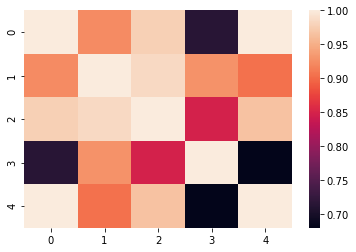

In [ ]:
sns.heatmap(pd.DataFrame(GM).corr())

### Factor Analysis

In [ ]:
fa = FactorAnalysis(n_components=2).fit(GM)

In [ ]:
L = fa.components_
print(L)
F = fa.transform(GM)
print(F[:10])

[[-11.17  -9.57  -8.67 -18.98 -14.88]
 [  0.32   0.5    0.72  -2.05  -0.28]]
[[ 0.02  1.84]
 [-0.87 -0.24]
 [-0.37 -1.04]
 [ 0.96 -1.41]
 [-0.21  1.12]
 [ 2.41  1.1 ]
 [ 1.35 -0.95]
 [-0.85  0.46]
 [ 0.77 -0.34]
 [ 1.25  1.01]]


In [ ]:
GM_recovered = fa.mean_ + np.dot(F,L)
GM_recovered[:10]

array([[ 66.04,  58.07,  54.41,  94.87,  83.25],
       [ 75.32,  65.55,  60.62, 116.05,  97.09],
       [ 69.5 ,  60.38,  55.72, 108.22,  89.9 ],
       [ 54.5 ,  47.45,  43.91,  83.71,  70.18],
       [ 68.37,  59.91,  55.88, 100.7 ,  86.86],
       [ 39.13,  34.86,  33.18,  51.1 ,  47.93],
       [ 50.35,  44.  ,  40.91,  75.45,  64.32],
       [ 75.33,  65.72,  60.96, 114.23,  96.6 ],
       [ 57.01,  49.84,  46.36,  85.19,  72.76],
       [ 52.08,  45.92,  43.18,  73.32,  65.24]])

In [ ]:
GM[:10]

array([[  0.  ,  21.99,  62.97,  50.07,  98.21],
       [ 75.57,  26.08,  82.78,  66.58, 126.88],
       [ 32.17,  13.58,  36.94,  29.19,  58.15],
       [ 54.19,  20.32,  60.47,  48.3 ,  93.68],
       [ 69.73,  26.23,  77.87,  62.18, 120.69],
       [ 61.72,  23.86,  69.36,  55.26, 107.9 ],
       [ 34.84,  14.07,  39.57,  31.4 ,  61.92],
       [ 51.23,  19.47,  57.34,  45.75,  89.  ],
       [ 41.19,  16.89,  46.95,  37.21,  73.62],
       [ 59.97,  23.44,  67.57,  53.78, 105.26]])

### Nonnegative Matrix Factorization

In [ ]:
nmf = NMF(n_components=2).fit(GM)
W = nmf.transform(GM)
H = nmf.components_
print(W[:10])
print(H)

[[3.79 1.64]
 [4.63 0.75]
 [4.32 0.53]
 [3.34 0.58]
 [4.02 1.34]
 [2.04 1.7 ]
 [3.01 0.8 ]
 [4.56 1.01]
 [3.4  0.94]
 [2.93 1.5 ]]
[[15.55 13.44 12.32 25.05 20.34]
 [ 4.35  4.37  4.73  0.    3.78]]


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
GM_recovered = np.dot(W,H)
GM_recovered[:10]

array([[ 66.04,  58.07,  54.41,  94.88,  83.25],
       [ 75.32,  65.55,  60.62, 116.05,  97.1 ],
       [ 69.5 ,  60.38,  55.72, 108.23,  89.9 ],
       [ 54.5 ,  47.45,  43.91,  83.71,  70.18],
       [ 68.37,  59.91,  55.87, 100.71,  86.87],
       [ 39.13,  34.86,  33.18,  51.11,  47.93],
       [ 50.35,  44.  ,  40.91,  75.45,  64.32],
       [ 75.33,  65.72,  60.96, 114.24,  96.6 ],
       [ 57.01,  49.84,  46.36,  85.2 ,  72.76],
       [ 52.08,  45.92,  43.18,  73.33,  65.24]])

# Missing Value
Suppose that one of the values in the GM matrix is missing. Can we find/recover it? Unfortunately FA and NMF will not work if there are missing values in the dataset.

In [ ]:
GM[0,0] = np.nan
GM[:10]

array([[   nan,  58.07,  54.41,  94.87,  83.25],
       [ 75.32,  65.55,  60.62, 116.05,  97.09],
       [ 69.5 ,  60.38,  55.72, 108.22,  89.9 ],
       [ 54.5 ,  47.45,  43.91,  83.71,  70.18],
       [ 68.37,  59.91,  55.88, 100.7 ,  86.86],
       [ 39.13,  34.86,  33.18,  51.1 ,  47.93],
       [ 50.35,  44.  ,  40.91,  75.45,  64.32],
       [ 75.33,  65.72,  60.96, 114.23,  96.6 ],
       [ 57.01,  49.84,  46.36,  85.19,  72.76],
       [ 52.08,  45.92,  43.18,  73.32,  65.24]])

In [ ]:
fa = FactorAnalysis(n_components=2).fit(GM)

ValueError: ignored

### First Solution

One solution might be to set missing values to zero. This might work when there are a few missing values, but if most of the data is missing such as the case in rec. sys. this will not work

In [ ]:
GM[0,0] = 0
L = fa.components_
F = fa.transform(GM)
GM_recovered = fa.mean_ + np.dot(F,L)
GM_recovered[:10]

array([[ 49.28,  41.43,  36.58,  92.68,  68.1 ],
       [ 75.32,  65.55,  60.62, 116.05,  97.09],
       [ 69.5 ,  60.38,  55.72, 108.22,  89.9 ],
       [ 54.5 ,  47.45,  43.91,  83.71,  70.18],
       [ 68.37,  59.91,  55.88, 100.7 ,  86.86],
       [ 39.13,  34.86,  33.18,  51.1 ,  47.93],
       [ 50.35,  44.  ,  40.91,  75.45,  64.32],
       [ 75.33,  65.72,  60.96, 114.23,  96.6 ],
       [ 57.01,  49.84,  46.36,  85.19,  72.76],
       [ 52.08,  45.92,  43.18,  73.32,  65.24]])

In [ ]:
nmf = NMF(n_components=2)
nmf.fit(GM)
W = nmf.transform(GM)
H = nmf.components_
GM_recovered = np.dot(W,H)
GM_recovered[:10]


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


array([[  0.68,  56.5 ,  52.5 ,  97.26,  82.72],
       [ 75.37,  66.27,  61.49, 114.96,  97.33],
       [ 69.55,  61.45,  57.02, 106.6 ,  90.25],
       [ 54.53,  47.88,  44.43,  83.06,  70.32],
       [ 68.37,  58.91,  54.66, 102.22,  86.53],
       [ 38.07,  32.14,  29.82,  55.78,  47.22],
       [ 50.36,  43.73,  40.57,  75.86,  64.23],
       [ 75.36,  65.78,  61.04, 114.13,  96.62],
       [ 57.02,  49.45,  45.88,  85.79,  72.63],
       [ 52.04,  43.97,  40.8 ,  76.3 ,  64.59]])

### MF with SGD

In [ ]:
GM[0,0]=55.76

In [ ]:
x = GM.shape[0]
y = GM.shape[1] 
c1 = []
c2 = []
c3 = []
for i in range(x):
    for j in range(y):
        c1.append(i)
        c2.append(j)
        c3.append(GM[i,j])
SM = pd.DataFrame({"StudentID":c1,"CourseID":c2,"Grade":c3})
SM

,StudentID,CourseID,Grade
0,0,0,55.760000
1,0,1,21.990644
2,0,2,62.966582
3,0,3,50.074894
4,0,4,98.211788
...,...,...,...
495,99,0,45.941515
496,99,1,18.300759
497,99,2,52.000967
498,99,3,41.317004


In [ ]:
type(SM)

pandas.core.frame.DataFrame

In [ ]:
#SM.drop(0, axis=0, inplace=True)
#SM.drop(5, axis=0, inplace=True)
SM

,StudentID,CourseID,Grade
1,0,1,21.990644
2,0,2,62.966582
3,0,3,50.074894
4,0,4,98.211788
6,1,1,26.082312
...,...,...,...
495,99,0,45.941515
496,99,1,18.300759
497,99,2,52.000967
498,99,3,41.317004


In [ ]:
class MF:
    """
    prefs: matrix of prefences, column0=userid, column1=itemid, column2=pref, column3=timestamp 
    """
    def __init__(self, prefs, alpha=0.03, mylambda=0.1, n_factors = 10, n_iters = 50):
        self.alpha = alpha
        self.mylambda = mylambda
        self.n_iters = n_iters
        self.item_factors = {}
        self.user_factors = {}
        self.prefs = prefs
        # prefs is a matrix containing u, i, r values in each row. This is useful to shuffle and pass over
        # the data multiple times in an efficient way in the fit() method.
        for r in range(self.prefs.shape[0]):
            self.user_factors[self.prefs.iloc[r,0]] = np.random.rand(n_factors,1) - 0.5
            self.item_factors[self.prefs.iloc[r,1]] = np.random.rand(n_factors,1) - 0.5
        print("Finished initialization")
        
     
    def calc_error(self, X):
        error = 0
        for i in range(X.shape[0]):
            u_idx = X.iloc[i,0]
            i_idx = X.iloc[i,1]
            error += np.abs(X.iloc[i,2] - np.dot(self.user_factors[u_idx].T, self.item_factors[i_idx])[0,0])
        return error/X.shape[0]

        #print("Random Predictor Error:",error/self.prefs.shape[0])
        
    def fit(self, verbose=False, method="SGD"):
        if (method == "Random"):
            error = 0
            for i in range(self.prefs.shape[0]):
                u_idx = self.prefs.iloc[i,0]
                i_idx = self.prefs.iloc[i,1]
                error += np.abs(self.prefs.iloc[i,2] - np.random.randint(1,6))
            return error/self.prefs.shape[0]
            
        elif (method == "SGD"):
            if (verbose): 
                print("Initial error: ", self.calc_error(self.prefs))                      
            for t in range(self.n_iters):
                self.prefs = shuffle(self.prefs)
                for r in range(self.prefs.shape[0]):
                    u = self.prefs.iloc[r,0]
                    i = self.prefs.iloc[r,1]
                    error = self.prefs.iloc[r,2] - np.dot(self.user_factors[u].T, self.item_factors[i])[0,0]
                    self.user_factors[u] = self.user_factors[u] + self.alpha*(error*self.item_factors[i] - self.mylambda*self.user_factors[u])
                    self.item_factors[i] = self.item_factors[i] + self.alpha*(error*self.user_factors[u] - self.mylambda*self.item_factors[i])  
            
                if (verbose): 
                    print("Iteration: ", t)
                if (verbose): 
                    print("Train error: ", self.calc_error(self.prefs))                      


In [ ]:
mf = MF(SM, alpha=0.001, n_factors = 2, n_iters=10)
mf.fit(verbose=True, method="SGD")

Finished initialization
Initial error:  60.4517443718097
Iteration:  0
Train error:  60.27592288091602
Iteration:  1
Train error:  54.61240627132645
Iteration:  2
Train error:  10.635146916690193
Iteration:  3
Train error:  1.848122358830091
Iteration:  4
Train error:  0.6878087949155195
Iteration:  5
Train error:  0.6012313183052593
Iteration:  6
Train error:  0.5870216287402713
Iteration:  7
Train error:  0.5916019070473849
Iteration:  8
Train error:  0.5767262445010647
Iteration:  9
Train error:  0.5778563422559425


In [ ]:
U = pd.DataFrame()
for i in range(n):
  U = U.append(pd.DataFrame(mf.user_factors[i].T))
U

,0,1
0,2.146853,3.103266
0,2.532797,4.204564
0,1.041344,1.974205
0,2.184998,2.894017
0,2.481380,3.936584
...,...,...
0,2.870054,4.060552
0,2.188613,3.762690
0,1.838249,3.164169
0,1.545526,2.240398


In [ ]:
I = pd.DataFrame()
for i in range(k):
  I = I.append(pd.DataFrame(mf.item_factors[i].T))
I

,0,1
0,8.167605,12.448705
0,3.174607,4.703543
0,9.456484,13.762311
0,6.683215,11.521709
0,13.465758,22.159386


In [ ]:
GM_recovered = np.dot(U,I.T)[:10]
GM_recovered

array([[ 56.17,  21.41,  63.01,  50.1 ,  97.68],
       [ 73.03,  27.82,  81.82,  65.37, 127.28],
       [ 33.08,  12.59,  37.02,  29.71,  57.77],
       [ 53.87,  20.55,  60.49,  47.95,  93.55],
       [ 69.27,  26.39,  77.64,  61.94, 120.65],
       [ 61.81,  23.58,  69.44,  54.95, 107.26],
       [ 35.57,  13.58,  40.01,  31.52,  61.61],
       [ 50.81,  19.32,  56.76,  45.81,  88.96],
       [ 41.75,  15.9 ,  46.74,  37.44,  72.85],
       [ 60.25,  22.96,  67.57,  53.8 , 104.85]])

In [ ]:
GM[:10]

array([[ 55.76,  21.99,  62.97,  50.07,  98.21],
       [ 75.57,  26.08,  82.78,  66.58, 126.88],
       [ 32.17,  13.58,  36.94,  29.19,  58.15],
       [ 54.19,  20.32,  60.47,  48.3 ,  93.68],
       [ 69.73,  26.23,  77.87,  62.18, 120.69],
       [ 61.72,  23.86,  69.36,  55.26, 107.9 ],
       [ 34.84,  14.07,  39.57,  31.4 ,  61.92],
       [ 51.23,  19.47,  57.34,  45.75,  89.  ],
       [ 41.19,  16.89,  46.95,  37.21,  73.62],
       [ 59.97,  23.44,  67.57,  53.78, 105.26]])